C:\Users\Shakshi Singh\Documents\anaconda\envs\shakshi\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5268 - loss: 11.3321 - val_accuracy: 0.9013 - val_loss: 9.3944 - learning_rate: 0.0010
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7238 - loss: 9.0374 - val_accuracy: 0.9331 - val_loss: 7.9491 - learning_rate: 0.0010
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8580 - loss: 7.6336 - val_accuracy: 0.9331 - val_loss: 6.6680 - learning_rate: 0.0010
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9167 - loss: 6.3997 - val_accuracy: 0.9427 - val_loss: 5.5604 - learning_rate: 0.0010
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8977 - loss: 5.3938 - val_accuracy: 0.9331 - val_loss: 4.7411 - learning_rate: 0.0010
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9155 - loss: 4.5955 - val_accuracy: 0.9331 - val_loss: 4.0696 - learning_rate: 0.0010
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9248 - loss: 3.9208 - val_

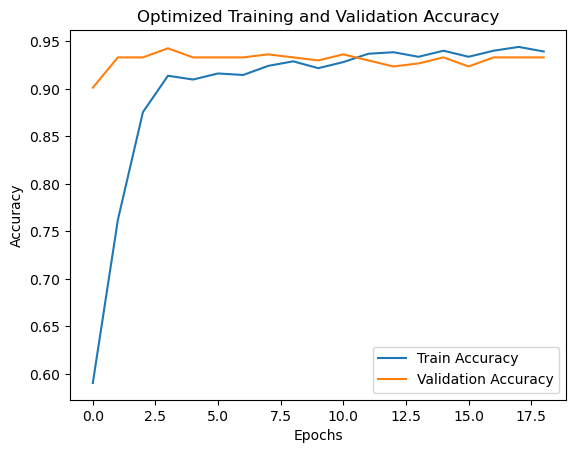

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Define the optimized MLP model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the data
# Replace the file paths with the actual paths if running locally
secom_data = pd.read_csv(r'C:\Users\Shakshi Singh\Documents\ml project\secom.data', sep=' ', header=None)
secom_labels = pd.read_csv(r'C:\Users\Shakshi Singh\Documents\ml project\secom_labels.data', sep=' ', header=None)

# Preprocessing
## 1. Extract features and labels
features = secom_data.copy()
labels = secom_labels[0]

## 2. Encode labels (1: fault, 0: normal)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

## 3. Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

## 4. Scale features for standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

## 5. Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.2, random_state=42, stratify=labels)


# Define the optimized model
optimized_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


# Compile the model with Adam optimizer and a learning rate scheduler
from tensorflow.keras.optimizers import Adam

optimized_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the optimized model
history_optimized = optimized_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=16,  # Smaller batch size for better gradient updates
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the optimized model
test_loss_optimized, test_accuracy_optimized = optimized_model.evaluate(X_test, y_test, verbose=0)

# Predictions and Classification Report
y_pred_optimized = (optimized_model.predict(X_test) > 0.5).astype(int)
print(f"Optimized Test Accuracy: {test_accuracy_optimized:.2f}")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))

# Plot Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(history_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Optimized Training and Validation Accuracy')
plt.show()
